# 01-img-explore.ipynb

## Import packages

In [1]:
# Standard library imports
from pathlib import Path
import sys
# Third party imports
import imageio as iio
import matplotlib.pyplot as plt
import napari
import numpy as np
import skimage
# Local imports
%load_ext autoreload
%autoreload 2
module_path = str(Path.cwd().parent)
if module_path not in sys.path:
    sys.path.append(module_path)
import glitchpy as glitch

# Load image

## Open napari window

In [2]:
viewer = napari.Viewer()

## Load raw image from file

In [3]:
img_path = Path(
    r"C:\Users\cgusb\Pictures\druid_arch_rocks.png"
)
if not img_path.exists():
    print(f'Image not found: {img_path}')
else:
    img = iio.imread(img_path)
    print(f'{img.shape=}')
    print(f'{img.dtype=}')
    viewer.add_image(img)

img.shape=(657, 876, 3)
img.dtype=dtype('uint8')


## Convert to 8-bit HSV and test conversion back to HSV

This shows that converting an HSV image converted from floating point to 8-bit can be converted back to RGB without converting back to floating point first.

In [4]:
img_hsv = skimage.color.rgb2hsv(img)
img_hsv = skimage.util.img_as_ubyte(img_hsv)
print(f'{img_hsv.shape=}')
print(f'{img_hsv.dtype=}')
viewer.add_image(img_hsv)


img_hsv.shape=(657, 876, 3)
img_hsv.dtype=dtype('uint8')


<Image layer 'img_hsv' at 0x1f4efdb0190>

In [5]:
img_rgb = skimage.color.hsv2rgb(img_hsv)
print(f'{img_rgb.shape=}')
print(f'{img_rgb.dtype=}')
viewer.add_image(img_rgb)

img_rgb.shape=(657, 876, 3)
img_rgb.dtype=dtype('float64')


<Image layer 'img_rgb' at 0x1f4f0010730>

## View image with hue only

(saturation and value all the way up) 

In [6]:
img_hue = img_hsv.copy()
img_hue[:, :, 1] = 255
img_hue[:, :, 2] = 255
img_hue = skimage.color.hsv2rgb(img_hue)
img_hue = skimage.util.img_as_ubyte(img_hue)
viewer.add_image(img_hue)

<Image layer 'img_hue' at 0x1f4f0010520>

In [7]:
img_hue_sat = img_hsv.copy()
img_hue_sat[:, :, 2] = 255
img_hue_sat = skimage.color.hsv2rgb(img_hue_sat)
img_hue_sat = skimage.util.img_as_ubyte(img_hue_sat)
viewer.add_image(img_hue_sat)

<Image layer 'img_hue_sat' at 0x1f4f03d4550>

Below image is unexpected because it's actually viewing RGB

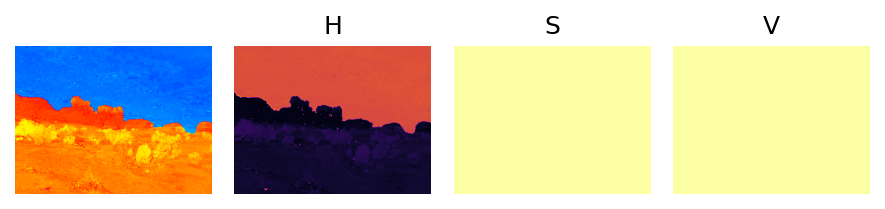

In [8]:
fig, axes = glitch.plot_image(img_hue, channels='HSV', dpi=150, tight_layout=True)

# Reduce number of hues

## Plot HSV channels

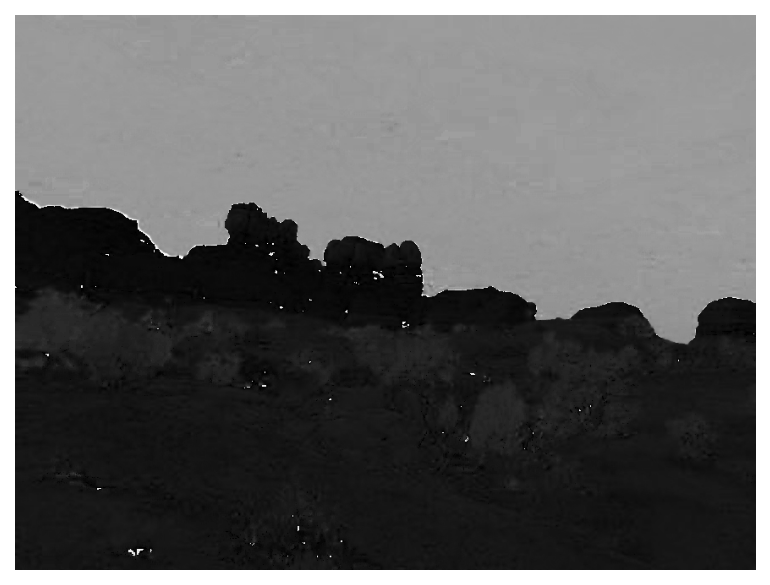

In [9]:
fig, ax = glitch.plot_channel(img, channel=0, dpi=150, tight_layout=True)
plt.show()

## Plot HSV histogram

Hue: [85]


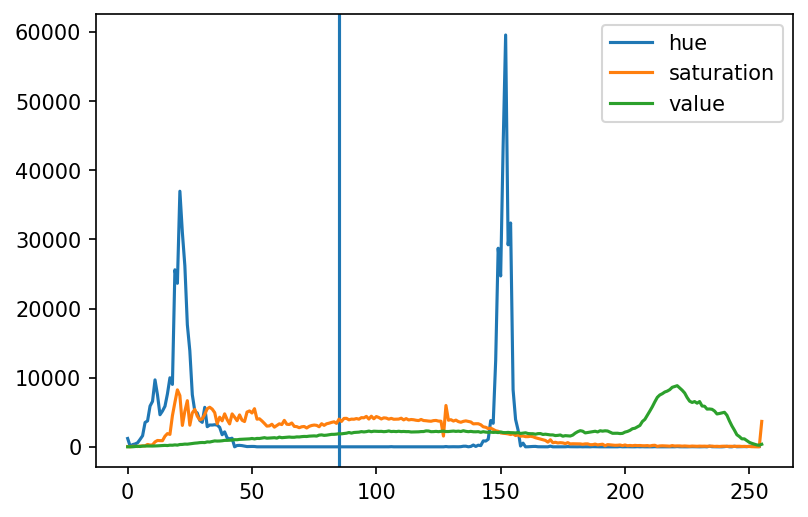

In [10]:
fig, ax = glitch.plot_hists(img_hsv, n_multiotsu=[2, 0, 0], dpi=150)
plt.show()

## Mask lower otsu

In [11]:
thresh_vals = [85]
thresh_pairs = []
if len(thresh_vals) == 1:
    thresh_vals.insert(0, 0)
    thresh_vals.append(255)
print(thresh_vals)
for low, high in zip(thresh_vals[0:-1], thresh_vals[1:]):
    print(low, high)
    thresh_pairs.append([low, high])

[0, 85, 255]
0 85
85 255


In [41]:
def get_multiotsu_masks(
    img, channel, n_otsu, img_type='RGB', channels='HSV'
):
    if n_otsu < 2:
        raise ValueError('n_otsu must be at least 2')
    img = glitch.convert_img(img, img_type, channels)
    thresh_vals = skimage.filters.threshold_multiotsu(img[:, :, channel], n_otsu)
    thresh_vals = list(thresh_vals)
    thresh_vals.insert(0, 0)
    thresh_vals.append(255)
    thresh_pairs = []
    masks = []
    for low, high in zip(thresh_vals[0:-1], thresh_vals[1:]):
        thresh_pairs.append([low, high])
        low_mask = (img[:, :, channel] > low).astype(float)
        high_mask = (img[:, :, channel] < high).astype(float)
        mask = low_mask * high_mask
        masks.append(mask)
    return masks

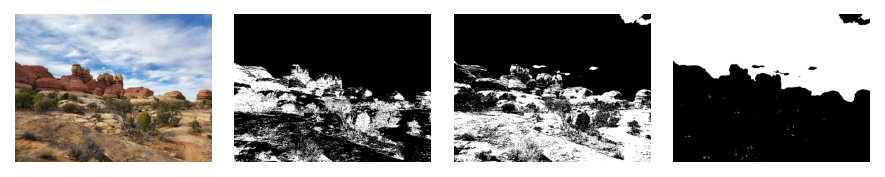

In [47]:
masks = get_multiotsu_masks(img_hsv, 0, 3)
fig, axes = glitch.plot_masks(
    img_hsv, masks, img_type='HSV', tight_layout=True, dpi=150
)
plt.show()